# Problem Statement


The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column **AveragePrice** is the average price of a single avocado.

This is the data that we have to predict for **future samples**.

## Importing packagaes

In [246]:
import numpy as np 
np.set_printoptions(precision=4)    # to disply values upto Four decimal places

import pandas as pd
pd.set_option('mode.chained_assignment', None)   #to supress pandas warnings


import matplotlib.pyplot as plt
plt.style.use('seaborn-white')            # To apply seaborn white style to the plots
plt.rc('figure', figsize=(14,10))         # Set the default figure size of plots
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")  # To supress all the warnings in the notebook


## Data Loading and Description 

In [247]:
train_df = pd.read_csv('avocado_train.csv')
train_df.head(5)

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [248]:
train_df.shape

(14599, 14)

- We have **18249** rows and **14 columns** in the given dataset

## Description of the dataset



|Column Name	                              | Description                                                                   |
| --------------------------------------------|------------------------------------------------------------------------------:| 
| ID	                                      | Unique identity of each observation                                           |
| Date	                                      | The date of the observation.                                         | 
| **AveragePrice**	                                  | **The average price of a single avocado** - [Target Variable.]                                      |
| type	                                  | Conventional or Organic.                                               |
| year	                              | The year                                           |
| Region	                      | The city or region of the observation.                                  |
| Total Volume	                              | Total number of avocados sold                                                |
| 4046	                              | Total number of avocados with PLU 4046 sold.                                       |
| 4225	                              |Total number of avocados with PLU 4225 sold.                                                 |
| 4770	                      | Total number of avocados with PLU 4770 sold.                                     |
| Total Bag	                          |Total Bags of Avocados sold                           |
| Small Bags	                                  | Total number of Small Bags of Avocados sold.                                            |
| Large Bags                                  | Total number of Large Bags of Avocados sold.                                                  |
| XLarge Bags	                                  | Total number of XLarge Bags of Avocados sold.                             |

In [249]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


- **info()**  function gives us the following insights into the avocado_df dataframe:
  - There are 9 float data points.
  - There are 2 Integer type data points.
  - There are 3 Object type data points.
  
  
- As per initial observation, it looks like there are **No Null** values present,
    <br>**We'll still confirm with a null check...**   

In [250]:
train_df.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- Which category has the highest proportion in the type column in train data?

In [251]:
train_df.type.value_counts()

conventional    7301
organic         7298
Name: type, dtype: int64

- How many duplicate rows are there in the train data before preprocessing?

In [252]:
train_df.duplicated(keep='last')

0        False
1        False
2        False
3        False
4        False
         ...  
14594    False
14595    False
14596    False
14597    False
14598    False
Length: 14599, dtype: bool

- How many missing cells are there in the train data before preprocessing?

In [253]:
train_df.isna().sum()

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- What is the maximum value in the AveragePrice column of the train data before preprocessing?

In [254]:
train_df.AveragePrice.max()

3.25

- Are there outliers in the AveragePrice column of the train data before preprocessing?

<AxesSubplot:xlabel='AveragePrice'>

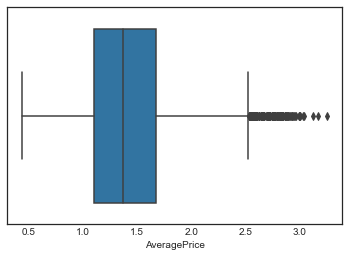

In [255]:
sns.boxplot(train_df.AveragePrice)

- What is the range of values (minimum to maximum) in the AveragePrice column of the train data before preprocessing?

In [256]:
train_df.AveragePrice.describe()

count    14599.000000
mean         1.409168
std          0.404518
min          0.440000
25%          1.100000
50%          1.370000
75%          1.670000
max          3.250000
Name: AveragePrice, dtype: float64

- Which original column has the highest positive correlation with the AveragePrice column?

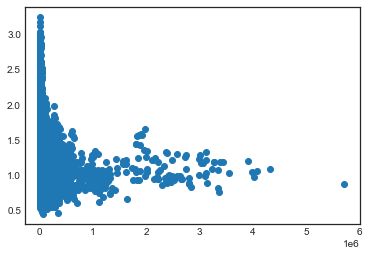

calculate covariance matrix
[[ 5.4917e+10 -1.6515e+04]
 [-1.6515e+04  1.6363e-01]]
Pearsons correlation: -0.174


In [257]:
from matplotlib import pyplot
pyplot.scatter(train_df['Large Bags'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['Large Bags'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['Large Bags'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

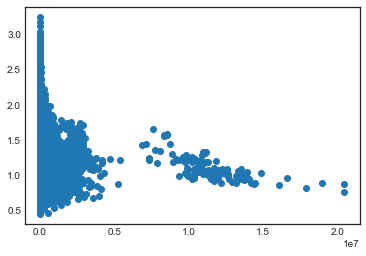

calculate covariance matrix
[[ 1.3230e+12 -8.0766e+04]
 [-8.0766e+04  1.6363e-01]]
Pearsons correlation: -0.174


In [258]:
from matplotlib import pyplot
pyplot.scatter(train_df['4225'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['4225'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['4225'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

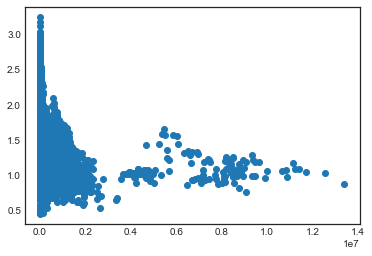

calculate covariance matrix
[[ 5.0968e+11 -5.0614e+04]
 [-5.0614e+04  1.6363e-01]]
Pearsons correlation: -0.175


In [259]:
from matplotlib import pyplot
pyplot.scatter(train_df['Small Bags'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['Small Bags'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['Small Bags'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

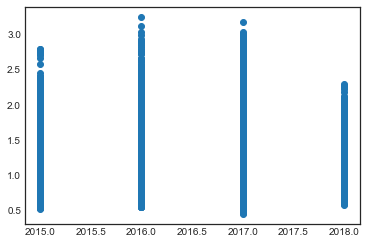

calculate covariance matrix
[[0.879  0.0378]
 [0.0378 0.1636]]
Pearsons correlation: 0.100


In [260]:
from matplotlib import pyplot
pyplot.scatter(train_df['year'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['year'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['year'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

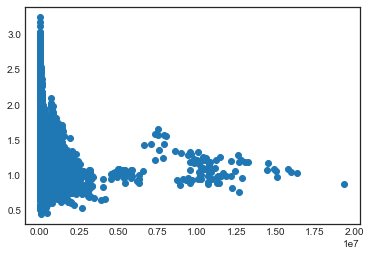

calculate covariance matrix
[[ 8.8921e+11 -6.7960e+04]
 [-6.7960e+04  1.6363e-01]]
Pearsons correlation: -0.178


In [261]:
from matplotlib import pyplot
pyplot.scatter(train_df['Total Bags'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['Total Bags'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['Total Bags'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

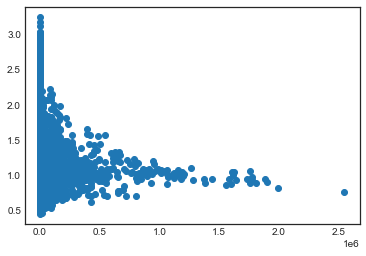

calculate covariance matrix
[[ 1.0519e+10 -7.4221e+03]
 [-7.4221e+03  1.6363e-01]]
Pearsons correlation: -0.179


In [262]:
from matplotlib import pyplot
pyplot.scatter(train_df['4770'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['4770'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['4770'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

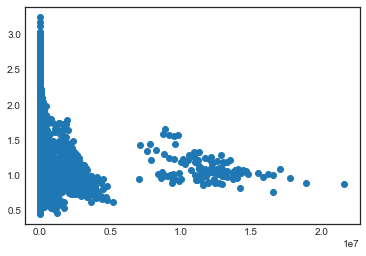

calculate covariance matrix
[[ 1.4563e+12 -1.0262e+05]
 [-1.0262e+05  1.6363e-01]]
Pearsons correlation: -0.210


In [263]:
from matplotlib import pyplot
pyplot.scatter(train_df['4046'], train_df.AveragePrice)
pyplot.show()
from numpy import cov
from scipy.stats import pearsonr
covariance = cov(train_df['4046'], train_df.AveragePrice)
print('calculate covariance matrix')
print(covariance)
corr, _ = pearsonr(train_df['4046'], train_df.AveragePrice)
print('Pearsons correlation: %.3f' % corr)

In [264]:
train_df.region.nunique()

54

### Data Exploration 

In [265]:
train_df.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

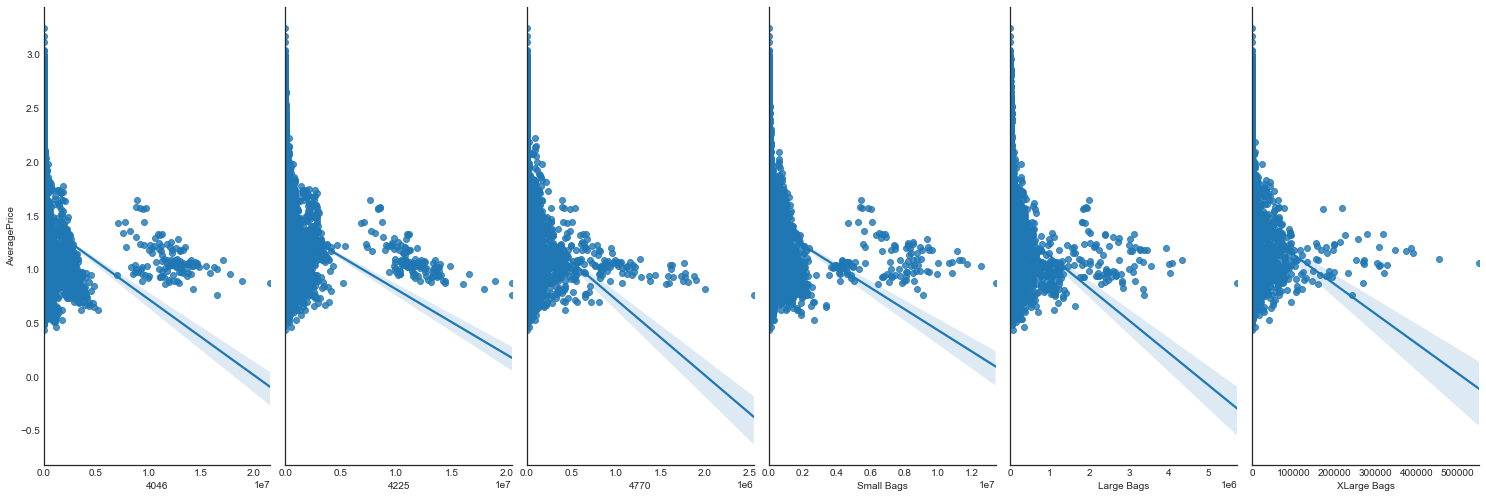

In [266]:
sns.pairplot(train_df, x_vars=['4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags' ], y_vars='AveragePrice', size=7, aspect=0.5, kind='reg')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

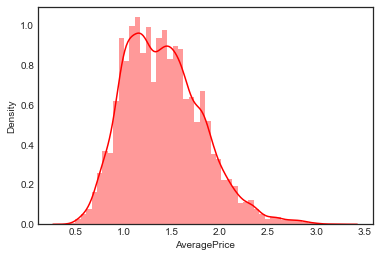

In [267]:
sns.distplot(train_df.AveragePrice , color="r")

- Average Price looks like a Normal Distribution , <br>This fulfills the first assumption for Linear Regression : **Target Variable should be Normally Distributed**

In [268]:
train_df.drop(['Id','Total Volume', 'Total Bags'], axis=1, inplace=True)

- We'll drop Total Volume as it is the sum of values in columns - 4046, 4225, 4770
- We'll drop Total Bags as it is the sum of values in columns - Small Bags, Large Bags and XLarge Bags

In [269]:
date_ordering = sorted(train_df['Date'].unique())

Encoding Variables

- We'll order date in ascending order to relate the prices with the date of transaction to know how old or new the prices are.
   - The older the date is, lower will be the index value

In [270]:
def ordinal_encoding(df, column, order):
    df[column] = df[column].apply(lambda x: order.index(x))
    return df

def one_hot(df, col):
    dummy_type = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, dummy_type], axis=1)
    df.drop(col, axis=1, inplace=True) #Dropping the original column as it has been eencoded and is not needed any further
    return df

In [271]:
ordinal_encoding(train_df, "Date", date_ordering)

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,137,1.86,61.21,143.82,0.00,2379.05,0.00,0.00,organic,2017,Albany
1,149,1.14,3181.00,43510.00,86.00,11788.00,42246.00,0.00,conventional,2017,Louisville
2,110,0.95,242212.80,81697.52,264.25,48557.37,57365.00,0.00,conventional,2017,Orlando
3,72,1.71,437.48,2422.71,544.63,2021.67,6.67,0.00,organic,2016,Charlotte
4,53,1.66,2123.47,2121.26,0.00,392.02,977.34,0.00,organic,2016,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...
14594,70,0.93,17356.36,106300.33,18838.87,54973.21,27766.71,3365.91,conventional,2016,Indianapolis
14595,26,1.19,146171.45,428389.18,19546.92,88349.57,54456.03,0.00,conventional,2015,Denver
14596,26,1.45,797.75,35080.61,3980.63,28845.65,217.78,0.00,conventional,2015,Syracuse
14597,109,0.97,75074.86,76042.48,151.02,59129.65,1337.38,408.33,conventional,2017,Roanoke


In [272]:
train_df = one_hot(train_df, 'type')
train_df = one_hot(train_df, 'region')

In [273]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 14599 non-null  int64  
 1   AveragePrice         14599 non-null  float64
 2   4046                 14599 non-null  float64
 3   4225                 14599 non-null  float64
 4   4770                 14599 non-null  float64
 5   Small Bags           14599 non-null  float64
 6   Large Bags           14599 non-null  float64
 7   XLarge Bags          14599 non-null  float64
 8   year                 14599 non-null  int64  
 9   organic              14599 non-null  uint8  
 10  Atlanta              14599 non-null  uint8  
 11  BaltimoreWashington  14599 non-null  uint8  
 12  Boise                14599 non-null  uint8  
 13  Boston               14599 non-null  uint8  
 14  BuffaloRochester     14599 non-null  uint8  
 15  California           14599 non-null 

In [274]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

- As we can see, there are majorly 3 datatypes that we are dealing with:
    - Int
    - float
    - object

In [275]:
train_df.rename(columns={'Small Bags': 'SmallBags', 'Large Bags': 'LargeBags', 'XLarge Bags': 'XLBags'}, inplace=True)

In [276]:
#Analysing the target variable
train_df.AveragePrice.value_counts().sample(5)

1.70     93
2.22     19
1.74     89
1.66    102
2.49      4
Name: AveragePrice, dtype: int64

In [277]:
print("The Average Values of Avocados ranges between {0} and {1}".format(train_df.AveragePrice.min(), train_df.AveragePrice.max()))

The Average Values of Avocados ranges between 0.44 and 3.25


In [278]:
X = train_df.loc[:, train_df.columns != 'AveragePrice']
y = pd.DataFrame(train_df.AveragePrice)

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Modules for executing time and error
from sklearn import metrics
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [281]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)

X_train shape :  (11679, 62)
y_train shape :  (11679, 1)


In [282]:
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_test shape :  (2920, 62)
y_test shape :  (2920, 1)


In [283]:
scaler = StandardScaler() # create an object

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


We are using 3 modelling techniques to get the best results. We aim the following:

  - Low Errors in test set (RMSE)
  - High R-squared and Adjusted R-squared score

### Linear Regression with GridSearch CV

In [284]:
linreg = LinearRegression()
parameters = {'normalize':[True,False], 'copy_X':[True, False]}
linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
start_time = time.process_time()                                                 # to measure training time

linreg.fit(X_train_scaled, y_train)                       # fit the model to the training data (learn the coefficients)
print("Total Training Time : %s seconds" %(time.process_time() - start_time))
print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  

Total Training Time : 2.359375 seconds
Mean cross-validated score of the best_estimator :  0.5913420678214827


### Prediction

In [285]:
#prediction
y_pred_train  = linreg.predict(X_train_scaled)
time_pred = time.process_time()
y_pred_test = linreg.predict(X_test_scaled)                                     # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.process_time() - time_pred))

Total predicting time for the test set : 0.0 seconds


### Evalution Metrics

In [286]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
# MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)

MSE_test = metrics.mean_squared_error(y_test,y_pred_test)

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))            # compute the RMSE of our predictions
# RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.19289887012062615
MSE of the model is 0.06553460936710606
RMSE of the model is 0.2559972839057205
R squared error of the model is 0.5797138507265134
Adjusted R squared error of the model is 0.5705931852540052
--------------------------------------------------------------------------


#### Predictions for submission file 

In [287]:
test_df = pd.read_csv('avocado_test.csv')
test_df.shape

(3650, 13)

In [288]:
submission = pd.DataFrame()
submission['Id'] = test_df['Id']

In [289]:
test_df.drop(['Id','Total Volume', 'Total Bags'], axis=1, inplace=True)
test_df.shape

(3650, 10)

In [290]:
test_df.region.nunique()

54

In [291]:
test_df.head(5)

,Date,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-05-03,426.78,6174.20,548.21,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,2017-10-08,2749.91,124.43,0.00,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,2017-07-02,740503.01,1423924.97,356791.68,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,2017-05-14,1032.62,43170.45,42.00,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,2015-12-13,592.64,2602.48,0.00,696.67,702.92,0.00,organic,2015,Nashville


In [292]:
ordinal_encoding(test_df, "Date", date_ordering)
test_df = one_hot(test_df, 'type')
test_df = one_hot(test_df, 'region')

In [293]:
test_df.columns

Index(['Date', '4046', '4225', '4770', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'year', 'organic', 'Atlanta', 'BaltimoreWashington',
       'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte',
       'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco',
       'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane',
       'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
      dtype='object')

In [294]:
X_train.columns

Index(['Date', '4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLBags',
       'year', 'organic', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit',
       'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco',
       'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane',
       'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
      dtype='object')

In [295]:
test_df.shape

(3650, 62)

In [296]:
pred_test = linreg.predict(test_df)

In [298]:
submission['AveragePrice'] = pred_test
submission.to_csv('submission.csv', index=False)

### Decision Tree Regression with GridSearchCV

In [42]:
dt=DecisionTreeRegressor()

In [43]:
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               }

In [44]:
dt_model = GridSearchCV(estimator = dt, param_grid=param_grid, cv = 3, n_jobs = -1 ) #n_jobs=-1 to use all the cores

start_time = time.process_time()
dt_model.fit(X_train_scaled,y_train)
print('Total Training Time : %s seconds'%(time.process_time() - start_time))

Total Training Time : 0.78125 seconds


### Predictions

In [46]:
y_pred_train = dt_model.predict(X_train_scaled)

time_pred = time.process_time()
y_pred_test = dt_model.predict(X_test_scaled)                         # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.process_time() - time_pred))

Total predicting time for the test set : 0.0 seconds


### Evalution Metrics

In [47]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.11643493150684932
MSE of the model is 0.031490034246575344
RMSE of the model is 0.2553558658351937
R squared error of the model is 0.8015315521408709
Adjusted R squared error of the model is 0.7971535716733902
--------------------------------------------------------------------------


In [48]:
dt_model.score(X_train_scaled,y_train)

1.0

In [49]:
dt_model.best_params_

{'max_depth': None, 'max_features': 'auto'}

### Random Forest Regression with GridSearchCV 

In [50]:
rf=RandomForestRegressor()

In [51]:
# Number of trees in random forest
n_estimators = [100,200,300,500]
# Number of features to consider at every split
# max_features = ['auto', 'log2','sqrt',4,8,12]
max_features = ['auto', 0.2,'log2',0.4,0.6]
# Maximum number of levels in tree
max_depth = [8,16,25]

max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               "bootstrap": [True, False],
               "oob_score": [True]      #oob_score: Out of Bag Score; Bagging or Bootstrap Aggregation of scores
               }

In [52]:
rf_model = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 3, n_jobs = -1 ) #n_jobs=-1 to use all the cores
start_time = time.process_time()
rf_model.fit(X_train_scaled,y_train)
print("Total Training Time : %s seconds" %(time.process_time() - start_time ))

Total Training Time : 41.4375 seconds


### Predictions

In [53]:
rf_best_model = rf_model.best_estimator_         #replacing with the best estimator
y_pred_train = rf_best_model.predict(X_train_scaled)

time_pred = time.process_time()
y_pred_test = rf_best_model.predict(X_test_scaled)                         # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.process_time() - time_pred))

Total predicting time for the test set : 0.828125 seconds


### Evalution Metrics

In [54]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.08102536179604275
MSE of the model is 0.013113203267763848
RMSE of the model is 0.2553558658351937
R squared error of the model is 0.9173529924218045
Adjusted R squared error of the model is 0.915529896666403
--------------------------------------------------------------------------


In [55]:
rf_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.4,
 'n_estimators': 500,
 'oob_score': True}

In [56]:
rf_model.score(X_train_scaled, y_train)

0.9885437926386479

In [57]:
rf_model.best_estimator_

RandomForestRegressor(max_features=0.4, n_estimators=500, oob_score=True)

### Plotting predicted values and actual values 

In [58]:
y_test_flat = y_test.values.flatten()
y_test_flat

array([1.  , 1.8 , 1.76, ..., 1.27, 1.63, 1.58])

Text(0, 0.5, 'Predicted Test Value')

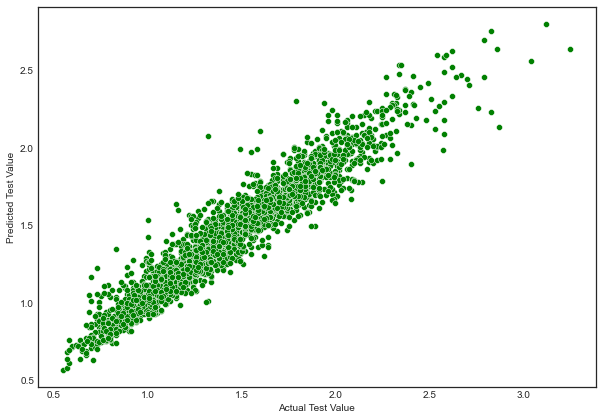

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= y_test_flat, y=y_pred_test, color='g')
plt.xlabel('Actual Test Value')
plt.ylabel("Predicted Test Value")

From the above plot we could observe that there is no much difference b/w actual & predicted values

We predicted the Average Prices of Avocados on the basis of various features using 3 models. The RMSE and R squared values of each of them are as follows:

|Algorithm used for the Model	| RMSE score  |       R-squared score                                |
| ------------------------------|-------------|-----------------------------------------------------:| 
| Linear Regression	            |      0.25   |        0.58                                          |
| Decision Trees                |      0.25   |        0.80                                          | 
| Random Forest  	            |      0.25   |        0.91                                          |

- While all the models have similar RMSE Scores, **Random Forest** has the greatest performance with the highest variance explained score (R-squared) of 0.91